In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/BTC-USD.csv')

data = data.drop(labels=range(364, 366), axis=0)

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,5.171314e+10
1,2021-05-04,57214.179688,57214.179688,53191.425781,53333.539063,53333.539063,6.856471e+10
2,2021-05-05,53252.164063,57911.363281,52969.054688,57424.007813,57424.007813,6.924132e+10
3,2021-05-06,57441.308594,58363.316406,55382.507813,56396.515625,56396.515625,6.952329e+10
4,2021-05-07,56413.953125,58606.632813,55321.847656,57356.402344,57356.402344,6.843402e+10
...,...,...,...,...,...,...,...
359,2022-04-27,38120.300781,39397.917969,37997.312500,39241.121094,39241.121094,3.098102e+10
360,2022-04-28,39241.429688,40269.464844,38941.421875,39773.828125,39773.828125,3.390370e+10
361,2022-04-29,39768.617188,39887.269531,38235.535156,38609.824219,38609.824219,3.088299e+10
362,2022-04-30,38605.859375,38771.210938,37697.941406,37714.875000,37714.875000,2.389571e+10


In [2]:
y = data['Close'].values
data=data.drop(columns = ['Close', 'Date'])
X = data.values

In [3]:

y=y.reshape(-1, 1)


import numpy as np
X=np.concatenate((X[1:], y[0:-1]), axis=1)

In [4]:
pip install keras-self-attention

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= sc.fit_transform(X)

In [12]:
pip install pyrcn

     |████████████████████████████████| 81 kB 7.2 MB/s 


In [5]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y[1:], test_size=0.2, shuffle=False, random_state=42)


In [7]:
x_train1.shape

(290, 6)

In [6]:
from pyrcn.base.blocks import InputToNode
from sklearn . datasets import make_blobs
# Generate a toy dataset

In [7]:
input_to_node = InputToNode (50, input_activation='relu',input_scaling =1.0 )


x_train= input_to_node.fit_transform (x_train1)
x_test= input_to_node.transform (x_test1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=50 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [8]:
from pyrcn.base.blocks import NodeToNode
node_to_node = NodeToNode (50, reservoir_activation='relu', spectral_radius =1.0 , leakage =0.5 ,bidirectional = False )
x_train=node_to_node . fit_transform(x_train)
x_test= node_to_node.transform (x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:77: FutureWarning: Pass hidden_layer_size=50 as keyword args. From version 1.1 (renaming of 0.26) passing these as positional arguments will result in an error
  FutureWarning,


In [9]:
a=x_test[0]
for i in range(1, len(x_test)):
    b=x_test[i].copy()

    x_test[i]=a
    a=b.copy()

x_test[0]=x_train[-1]
x_train1=x_train1[1:]
y_train1=y_train1[1:]

x_train=x_train[:-1]




In [10]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

x_train1 = x_train1.reshape((x_train1.shape[0], x_train1.shape[1], 1))
x_test1 = x_test1.reshape((x_test1.shape[0], x_test1.shape[1], 1))

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [13]:
from keras_self_attention import SeqSelfAttention
def build_model(
    input_shapey,
    input_shapez,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputsy = keras.Input(shape=input_shapey)
    inputsz = keras.Input(shape=input_shapez)
    y = inputsy
    z= inputsz

    #z=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(z)

    #y=layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(y)

    z=SeqSelfAttention()(z)
    #z=layers.Flatten()(z)
    z=layers.Dense(50, activation="tanh")(z)
    z=layers.Dense(5, activation="tanh")(z)
    z= layers.Reshape((-1,1))(z)
    #y=SeqSelfAttention()(y)



    x=layers.Concatenate(axis=1)([y, z])
    #x=layers.Add()([inputsy, inputsz])

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    #outputs = layers.Dense(5, activation="softmax")(x)
    outputs = layers.Dense(1)(x)
    return keras.Model([inputsy,inputsz], outputs)

In [14]:
input_shapey = x_train1.shape[1:]
input_shapez = x_train.shape[1:]

model = build_model(
    input_shapey,
    input_shapez,
    head_size=15,
    num_heads=2,
    ff_dim=2,
    num_transformer_blocks=2,
    mlp_units=[64],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mean_absolute_error"],
)
'''
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"],
)
'''
model.summary()





Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 1)]      0           []                               
                                                                                                  
 seq_self_attention (SeqSelfAtt  (None, 50, 1)       129         ['input_2[0][0]']                
 ention)                                                                                          
                                                                                                  
 dense (Dense)                  (None, 50, 50)       100         ['seq_self_attention[0][0]']     
                                                                                                  
 dense_1 (Dense)                (None, 50, 5)        255         ['dense[0][0]']              

In [23]:
model.compile(
    loss="mean_absolute_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-2),
    metrics=["mean_absolute_error"],
)
callbacks = [keras.callbacks.EarlyStopping(patience=200, restore_best_weights=True)]

history=model.fit(
    [x_train1,x_train],
    y_train1,
    validation_data=([x_test1, x_test], y_test1),
    epochs=2000,
    batch_size=128,
    callbacks=callbacks,
)

Epoch 1/2000
3/3 [==============================] - 6s 745ms/step - loss: 5491.6626 - mean_absolute_error: 5491.6626 - val_loss: 846.7410 - val_mean_absolute_error: 846.7410
Epoch 2/2000
3/3 [==============================] - 0s 41ms/step - loss: 5884.4492 - mean_absolute_error: 5884.4492 - val_loss: 1216.5535 - val_mean_absolute_error: 1216.5535
Epoch 3/2000
3/3 [==============================] - 0s 37ms/step - loss: 5496.7539 - mean_absolute_error: 5496.7539 - val_loss: 579.8011 - val_mean_absolute_error: 579.8011
Epoch 4/2000
3/3 [==============================] - 0s 30ms/step - loss: 5272.9502 - mean_absolute_error: 5272.9502 - val_loss: 640.4603 - val_mean_absolute_error: 640.4603
Epoch 5/2000
3/3 [==============================] - 0s 36ms/step - loss: 5136.7520 - mean_absolute_error: 5136.7520 - val_loss: 969.0312 - val_mean_absolute_error: 969.0312
Epoch 6/2000
3/3 [==============================] - 0s 29ms/step - loss: 5337.0200 - mean_absolute_error: 5337.0200 - val_loss: 1018

In [24]:
#testing prediction

#testing prediction
ypred=model.predict([x_test1, x_test])
#testing prediction

#testing prediction

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance
print('mse: ', mean_squared_error(ypred, y_test1))
print('mae: ', mean_absolute_error(ypred, y_test1))
print('r2_score: ', r2_score(ypred, y_test1))
print('explained_variance_score: ', explained_variance_score(ypred, y_test1))
print('max_error: ', max_error(ypred, y_test1))
#print('mean_squared_log_error: ', mean_squared_log_error(ypred, y_test1))
print('mean_poisson_deviance: ', r2_score(ypred, y_test1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(ypred, y_test1))


mse:  572161.5107175659
mae:  571.7129173356169
r2_score:  0.9168009341537137
explained_variance_score:  0.9185195488177075
max_error:  3107.92578125
mean_poisson_deviance:  0.9168009341537137


In [25]:
#training prediction
xpred=model.predict([x_train1, x_train])
print('mse: ', mean_squared_error(xpred, y_train1))
print('mae: ', mean_absolute_error(xpred, y_train1))
print('r2_score: ', r2_score(xpred, y_train1))
print('explained_variance_score: ', explained_variance_score(xpred, y_train1))
print('max_error: ', max_error(xpred, y_train1))
#print('mean_squared_log_error: ', mean_squared_log_error(xpred, y_train1))
print('mean_poisson_deviance: ', r2_score(xpred, y_train1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(xpred, y_train1))

mse:  976104.3109639949
mae:  749.2333275090826
r2_score:  0.9878507142331541
explained_variance_score:  0.9889759854867772
max_error:  3508.285156500002
mean_poisson_deviance:  0.9878507142331541


In [26]:
xx=[]
for i in range(len(ypred)):
    xx.append(i)

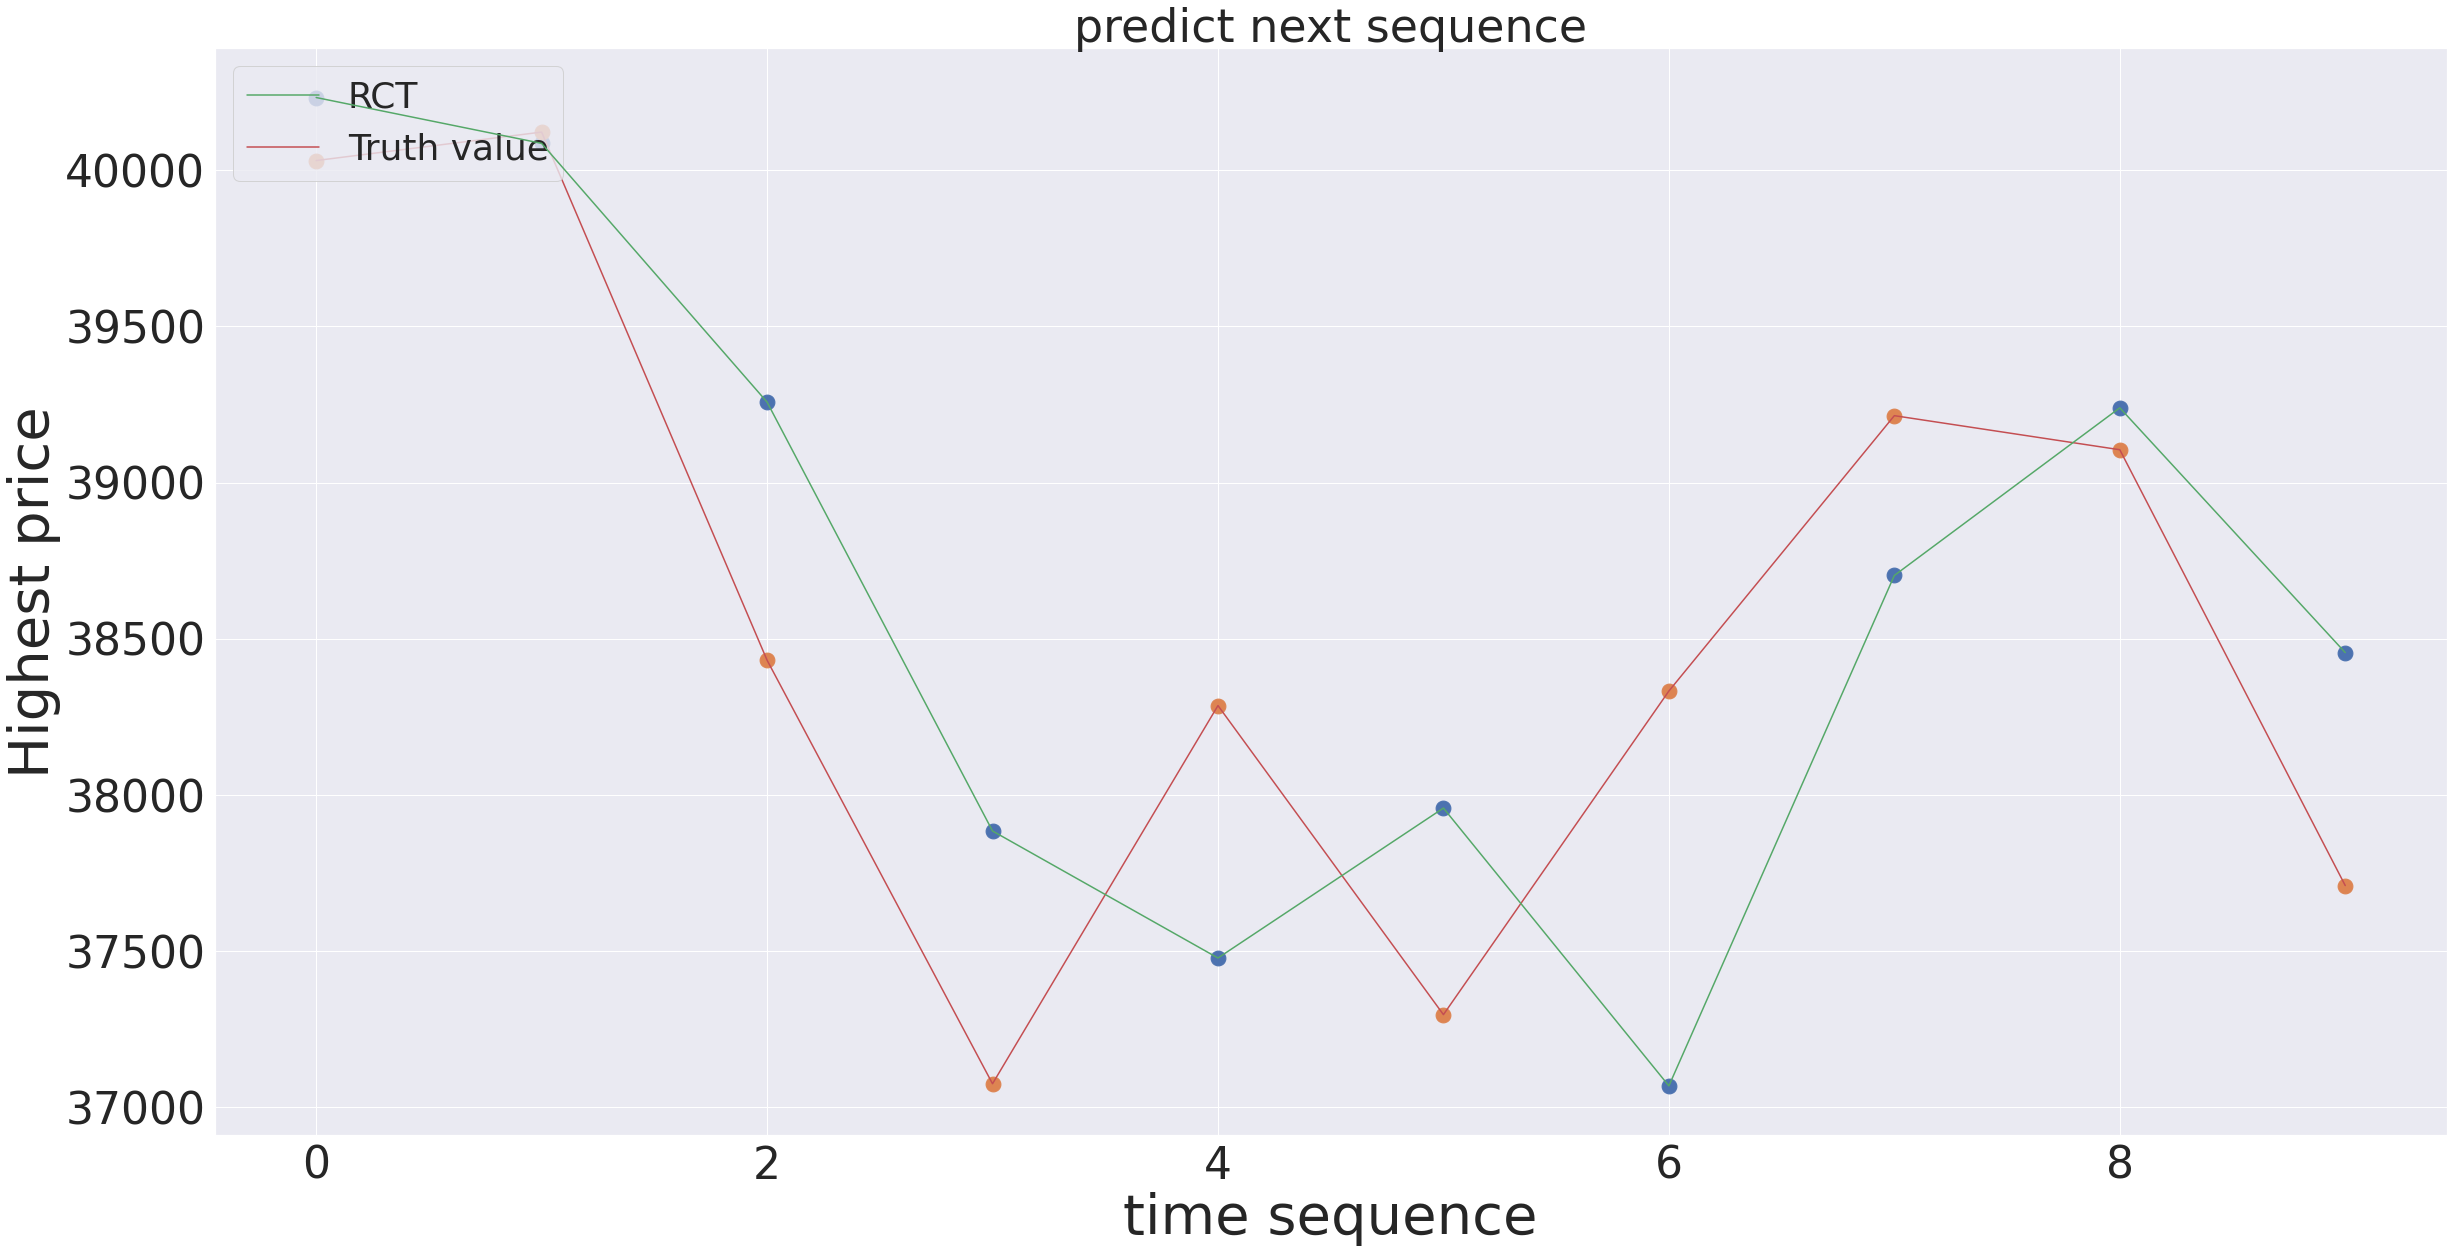

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=0
j=10
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],ypred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],y_test1[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],ypred[i:j],  s=220, zorder=2)
plt.scatter(xx[i:j],y_test1[i:j],  s=220, zorder=2)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

*** compare for the testing data***

In [ ]:
len(ypred)

5636

* compare for the trainig data
